In [1]:
#importing libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [2]:
#loading data

df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<Axes: >

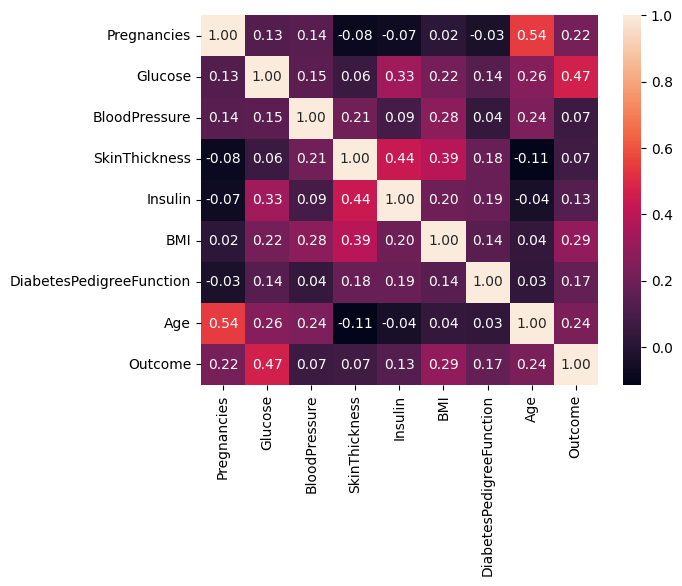

In [5]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [6]:
X = df.iloc[:, :8]
y = df.iloc[:, -1]

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)





In [44]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

#creating model

model = Sequential()  #sequential model
model.add(Dense(32, activation='relu',input_dim=8))
model.add(Dense(1,activation='sigmoid'))  #dense layer

In [45]:
#compiling model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,min_delta=0.00001,mode='auto'),



In [46]:
#running the model
hs = model.fit(x_train_scaled,y_train, epochs=10,validation_data=(x_test_scaled,y_test),callbacks=callback)

Epoch 1/10
20/20 [==============================] - 2s 22ms/step - loss: 0.6364 - Accuracy: 0.6287 - val_loss: 0.5825 - val_Accuracy: 0.7013
Epoch 2/10
20/20 [==============================] - 0s 8ms/step - loss: 0.5871 - Accuracy: 0.7085 - val_loss: 0.5501 - val_Accuracy: 0.7273
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5548 - Accuracy: 0.7345 - val_loss: 0.5274 - val_Accuracy: 0.7403
Epoch 4/10
20/20 [==============================] - 0s 8ms/step - loss: 0.5309 - Accuracy: 0.7508 - val_loss: 0.5112 - val_Accuracy: 0.7338
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5149 - Accuracy: 0.7573 - val_loss: 0.4962 - val_Accuracy: 0.7273
Epoch 6/10
20/20 [==============================] - 0s 8ms/step - loss: 0.5015 - Accuracy: 0.7557 - val_loss: 0.4876 - val_Accuracy: 0.7403
Epoch 7/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4915 - Accuracy: 0.7671 - val_loss: 0.4805 - val_Accuracy: 0.7403
Epoch 8/10
20/20 [=

In [47]:
loss , accuracy = model.evaluate(x_test_scaled, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

5/5 [==============================] - 0s 4ms/step - loss: 0.4687 - Accuracy: 0.7532
Test loss: 0.4687, Test accuracy: 0.7532


In [48]:
#making predictions with the model

predictions = model.predict(x_test_scaled)
print(predictions.shape)  # print shape of predictions

5/5 [==============================] - 0s 3ms/step
(154, 1)


In [56]:
print(predictions[:5]) #PRINT FIRST 5 PREDICTIONS

[[0.05385982]
 [0.2057959 ]
 [0.09693751]
 [0.42292255]
 [0.6832286 ]]


In [52]:
class_labels = [tf.argmax(prediction) for prediction in predictions]  #converts the prediction to a class label

In [55]:
print(class_labels[:5])

[<tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=0>]


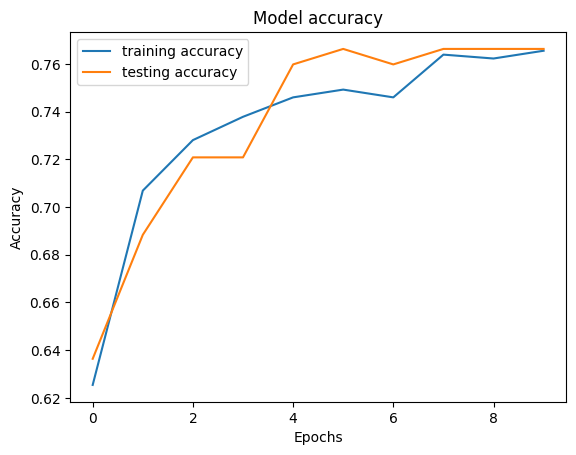

In [13]:
plt.plot(hs.history['Accuracy'],label='training accuracy')
plt.plot(hs.history['val_Accuracy'],label='testing accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

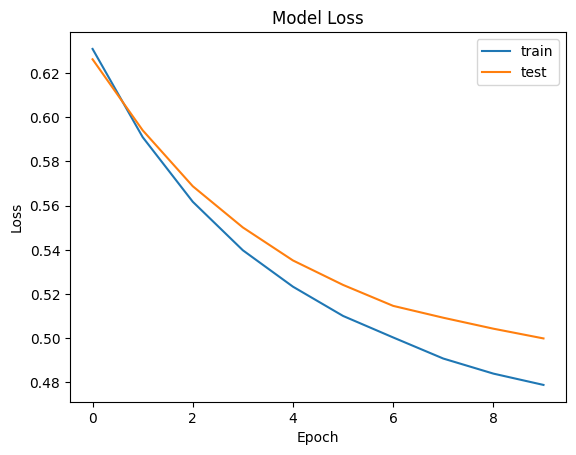

In [14]:
plt.plot(hs.history['loss'],label='train')
plt.plot(hs.history['val_loss'],label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()